Find articles that made it to certain journals and compare key words.

In [11]:
#Need to add parent directoy to sys.path to find 'metadataDB'
import sys
sys.path.append('../')

%matplotlib inline
import matplotlib.pyplot as plt 
import time
import numpy as np

# Natural language processing toolkit
# To use this, run nltk.download() and download 'stopwords'
from nltk.corpus import stopwords
s=stopwords.words('english') + ['', 'comment']

# SQL
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from metadataDB.declareDatabase import *
from sqlalchemy import or_

engine = create_engine("sqlite:///../arXiv_metadata.db", echo=False)
Base.metadata.bind = engine
DBsession = sessionmaker(bind=engine)
session = DBsession()

In [12]:
query = session.query(Article).filter(or_(Article.journal_ref.like('Physics Review Letters%'),
                                          Article.journal_ref.like('Phys. Rev. Lett.%'),
                                          Article.journal_ref.like('PRL%'),
                                          ))
# query = session.query(Article).filter(Article.journal_ref.like('PRL%'))
resultPRL = query.all()

In [13]:
query = session.query(Article).filter(or_(Article.journal_ref.like('Nature%'),
                                          Article.journal_ref.like('Nat.%'),
                                          Article.journal_ref.like('Science%')))
# query = session.query(Article).filter(Article.journal_ref.like('PRL%'))
resultNatureScience = query.all()

In [14]:
title = dict()
titlePRL = dict()

numWords = 0
numAbstracts = len(resultPRL)

start = time.time()
for item in resultPRL:
#     print item.abstract
    for word in set((item.title).replace('\n',' ') \
                                   .replace('\\','') \
                                   .replace('(','') \
                                   .replace(')','') \
                                   .split(' ')):
        if (word.lower() not in s) and (word.isalpha()):
            if word in titlePRL.keys():
                titlePRL[word] += 1
            else:
                titlePRL[word] =1
            if word in title.keys():
                title[word] -= 1./numAbstracts
            else:
                title[word] = -1./numAbstracts
            numWords += 1

total_time = time.time() - start
print "%f sec., %i abstracts, %i words" % (total_time, numAbstracts, numWords)
print "%0.0f abstracts per second" % (numAbstracts/total_time)
print "%0.0f words per second" % (numWords/total_time)

3.960158 sec., 3652 abstracts, 21562 words
922 abstracts per second
5445 words per second


In [15]:
#abstractNature = dict()
titleNature = dict()

numWords = 0
numAbstracts = len(resultNatureScience)

start = time.time()
for item in resultNatureScience:
#     print item.abstract
    for word in set((item.title).replace('\n',' ') \
                                   .replace('\\','') \
                                   .replace('(','') \
                                   .replace(')','') \
                                   .split(' ')):
        if (word.lower() not in s) and (word.isalpha()):
            if word in titleNature.keys():
                titleNature[word] += 1
            else:
                titleNature[word] =1
            if word in title.keys():
                title[word] += 1./numAbstracts
            else:
                title[word] = 1./numAbstracts
        numWords += 1

total_time = time.time() - start
print "%f sec., %i abstracts, %i words" % (total_time, numAbstracts, numWords)
print "%0.0f abstracts per second" % (numAbstracts/total_time)
print "%0.0f words per second" % (numWords/total_time)

0.687578 sec., 630 abstracts, 5640 words
916 abstracts per second
8203 words per second


In [16]:
# Want to sort dictionary by values. Convert it to a list of tuples so we can use python's sort functions
wordslist = sorted([(key, val) for key, val in title.iteritems()], key=lambda x: x[1])

In [17]:
words_best_and_worst = wordslist[0:10] + wordslist[-11:-1]
print words_best_and_worst

[(u'model', -0.020814861176307015), (u'States', -0.020044680888054403), (u'Hall', -0.017751525582850952), (u'systems', -0.016159877605660768), (u'transition', -0.015013299953059044), (u'spin', -0.014363080025730739), (u'Model', -0.014350040856064951), (u'Dynamics', -0.013310384394721746), (u'states', -0.013096542012204709), (u'Fermi', -0.010905961508371182), (u'High', 0.009630730715068066), (u'cavity', 0.01050783219457918), (u'Observation', 0.010721674577096269), (u'Galactic', 0.01111111111111111), (u'Galaxy', 0.01111111111111111), (u'Gas', 0.011710043637754483), (u'superconductor', 0.012146421182565764), (u'star', 0.012698412698412697), (u'Formation', 0.01329734522505607), (u'galaxies', 0.015873015873015872)]


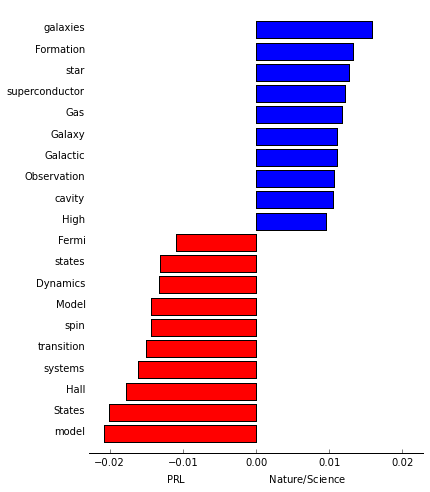

In [18]:
words = [x for (x,y) in words_best_and_worst]
vals = np.array([y for (x,y) in words_best_and_worst])


ind = np.arange(0, len(words))
c = ['b' if x > 0 else 'r' for x in vals]

plt.figure(frameon=False, figsize=(6,8))
plt.barh(ind - 0.5,
         vals,
         color=c)
plt.yticks(ind, words)
plt.ylim(ind[0]-1, ind[-1]+1)
plt.xlim(-1.1*np.max(np.abs(vals)), 1.1*np.max(np.abs(vals)))
plt.xlabel('PRL$\qquad\qquad\qquad$Nature/Science')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('none')

In [19]:
session.close()